In [1]:
import pandas as pd

##### 도서 표 - 도서 차트 변환

In [3]:
data = pd.read_csv('data/도서_구입량_result.csv')
print(data.shape)
print(type(data))
data

(1, 10)
<class 'pandas.core.frame.DataFrame'>


,구분,2019_오디오북,2021_오디오북,2023_오디오북,2019_전자책,2021_전자책,2023_전자책,2019_종이책,2021_종이책,2023_종이책
0,구입량(구입자 기준),6.2,4.9,7.7,8.3,7.2,7.7,6.7,5.6,3.7


In [ ]:
# 데이터 불러오기
df = pd.read_csv('data/도서_구입량_result.csv', index_col='구분')

# 긴 형태로 변환
df_melted = df.reset_index().melt(id_vars='구분', var_name='연도_형태', value_name='구입량')

# 연도 및 형태 추출
df_melted['연도'] = df_melted['연도_형태'].str.extract(r'(\d{4})')
df_melted['형태'] = df_melted['연도_형태'].str.extract(r'_(오디오북|전자책|종이책)')

# NaN 있는 행 제거 (연도 추출 실패한 경우)
df_melted = df_melted.dropna(subset=['연도', '형태'])

# 연도는 정수형으로 변환
df_melted['연도'] = df_melted['연도'].astype(int)

# 구입자 기준 데이터만 선택하고 '구분' 컬럼 제거
df_cleaned = df_melted[df_melted['구분'] == '구입량(구입자 기준)'].drop(columns=['구분', '연도_형태'])

data = df_cleaned.sort_values(by=['형태', '연도'], ascending=True).reset_index(drop=True)

print(data)

   구입량    연도    형태
0  6.2  2019  오디오북
1  4.9  2021  오디오북
2  7.7  2023  오디오북
3  8.3  2019   전자책
4  7.2  2021   전자책
5  7.7  2023   전자책
6  6.7  2019   종이책
7  5.6  2021   종이책
8  3.7  2023   종이책


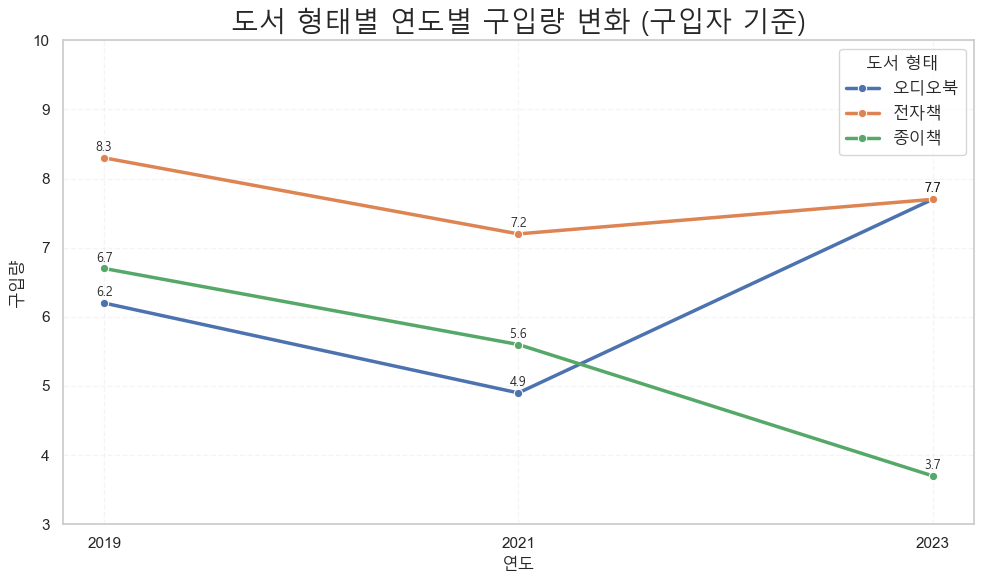

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 한글 폰트 설정 (윈도우용)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = font_manager.FontProperties(fname=font_path)

# 시각화
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# 꺾은선 그래프: 형태별로 색상 다르게
sns.lineplot(data=data, x='연도', y='구입량', hue='형태', marker='o', linewidth=2.5)

# 각 지점에 값 표시
for i in range(len(data)):
    row = data.iloc[i]
    plt.text(row['연도'], row['구입량'] + 0.1, str(row['구입량']),
             ha='center', fontsize=9, fontproperties=font_prop)

# 제목 및 축 라벨
# Malgun Gothic 폰트에 크기 25 적용
font_size = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf", size=20)

# 제목에 적용
plt.title('도서 형태별 연도별 구입량 변화 (구입자 기준)', fontproperties=font_size)
plt.xlabel('연도', fontproperties=font_prop)
plt.ylabel('구입량', fontproperties=font_prop)
plt.xticks([2019, 2021, 2023])

# 범례 폰트 설정
plt.legend(title='도서 형태', prop=font_prop, title_fontproperties=font_prop)
plt.ylim(3, 10) 
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()
